In [2]:
%matplotlib inline
#%seaborn inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn
from pandasql import sqldf

In [3]:
from pathlib import Path
# `path.parents[1]` is the same as `path.parent.parent`
d = Path().resolve()
d

PosixPath('/home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01')

In [4]:
## lecture csv
def get_df_from_csv(pPath):
    print("pPath: ", pPath)
    df = pd.read_csv(pPath)
    return df
    

##
#### Question 1.1 charges les données
##

In [5]:
# lecture csv DonneesDiabete_v0r2.csv
fileName = "DonneesDiabete_v0r2.csv"
dfDiabetes = get_df_from_csv(str(d)+"/"+fileName)
dfDiabetes.describe()

pPath:  /home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01/DonneesDiabete_v0r2.csv


,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient
count,768.000000,768.000000,763.000000,740.000000,541.000000,392.000000,757.000000,768.000000
mean,384.500000,3.845052,121.686763,71.594595,29.153420,155.905612,32.457464,33.240885
std,221.846794,3.369578,30.535641,14.468031,10.476982,118.920588,6.924988,11.760232
min,1.000000,0.000000,44.000000,-1.000000,7.000000,14.000000,18.200000,21.000000
25%,192.750000,1.000000,99.000000,64.000000,22.000000,76.750000,27.500000,24.000000
50%,384.500000,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000
75%,576.250000,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,41.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


In [6]:
dfDiabetes.head()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?
0,1,6,148.0,72.0,35.0,NaN,33.6,50,Oui
1,2,1,85.0,66.0,29.0,NaN,26.6,31,Non
2,3,8,183.0,64.0,NaN,NaN,23.3,32,Oui
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui


In [7]:
dfDiabetes.columns

Index(['Patient_ID', 'Nombre de grossesses', 'Glycémie 2 h (mg/dl)',
       'Pression artérielle (mm Hg)', 'Épaisseur pli triceps (mm)',
       'Insuline (uU/mL)', 'Indice de masse corporelle', 'Âge patient',
       'Atteint diabète?'],
      dtype='object')

In [8]:
###
# Creating numeric columns
###

colsAtteintDiab= pd.get_dummies(dfDiabetes['Atteint diabète?'], prefix='AtteintDiab')

colsAtteintDiab

,AtteintDiab_Non,AtteintDiab_Oui
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [9]:
## concatenate side by side
dfDiabetes = pd.concat([dfDiabetes, colsAtteintDiab], axis=1)

##
##### Q 1.1)  colonnes numériques  générées et concaténées
##

In [10]:
dfDiabetes.head()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
0,1,6,148.0,72.0,35.0,NaN,33.6,50,Oui,0,1
1,2,1,85.0,66.0,29.0,NaN,26.6,31,Non,1,0
2,3,8,183.0,64.0,NaN,NaN,23.3,32,Oui,0,1
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui,0,1


##
#### Q 1.2 - Indice de complétude et qualité
##

In [11]:
## combien de nulls?
dfDiabetes.isnull().sum()  

Patient_ID                       0
Nombre de grossesses             0
Glycémie 2 h (mg/dl)             5
Pression artérielle (mm Hg)     28
Épaisseur pli triceps (mm)     227
Insuline (uU/mL)               376
Indice de masse corporelle      11
Âge patient                      0
Atteint diabète?                 0
AtteintDiab_Non                  0
AtteintDiab_Oui                  0
dtype: int64

In [12]:
##combien de nulls en %
100*(dfDiabetes.isnull().sum() / len(dfDiabetes))

Patient_ID                      0.000000
Nombre de grossesses            0.000000
Glycémie 2 h (mg/dl)            0.651042
Pression artérielle (mm Hg)     3.645833
Épaisseur pli triceps (mm)     29.557292
Insuline (uU/mL)               48.958333
Indice de masse corporelle      1.432292
Âge patient                     0.000000
Atteint diabète?                0.000000
AtteintDiab_Non                 0.000000
AtteintDiab_Oui                 0.000000
dtype: float64

##
##### Q 1.2) Il y a trop de nulls dans le colonne 'Épaisseur pli triceps (mm)' et 'Insuline (uU/mL)'
##### En plus, via la commande 'describe()' on a identifié une pression arterielle négative
##

##
#### Q 1.3 Pré-traitement
##

In [13]:
## La seule colonne ayant un seuil de complétude < 60% est 'Insuline (uU/mL)'
dfDiabetes.drop(axis=1, columns='Insuline (uU/mL)')

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
0,1,6,148.0,72.0,35.0,33.6,50,Oui,0,1
1,2,1,85.0,66.0,29.0,26.6,31,Non,1,0
2,3,8,183.0,64.0,NaN,23.3,32,Oui,0,1
3,4,1,89.0,66.0,23.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,43.1,33,Oui,0,1
...,...,...,...,...,...,...,...,...,...,...
763,764,10,101.0,76.0,48.0,32.9,63,Non,1,0
764,765,2,122.0,70.0,27.0,36.8,27,Non,1,0
765,766,5,121.0,72.0,23.0,26.2,30,Non,1,0
766,767,1,126.0,60.0,NaN,30.1,47,Oui,0,1


In [14]:
### removing NA
dfDiabetes.dropna(inplace=True)
dfDiabetes

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,Atteint diabète?,AtteintDiab_Non,AtteintDiab_Oui
3,4,1,89.0,66.0,23.0,94.0,28.1,21,Non,1,0
4,5,0,137.0,40.0,35.0,168.0,43.1,33,Oui,0,1
6,7,3,78.0,50.0,32.0,88.0,31.0,26,Oui,0,1
8,9,2,197.0,70.0,45.0,543.0,30.5,53,Oui,0,1
13,14,1,189.0,60.0,23.0,846.0,30.1,59,Oui,0,1
...,...,...,...,...,...,...,...,...,...,...,...
753,754,0,181.0,88.0,44.0,510.0,43.3,26,Oui,0,1
755,756,1,128.0,88.0,39.0,110.0,36.5,37,Oui,0,1
760,761,2,88.0,58.0,26.0,16.0,28.4,22,Non,1,0
763,764,10,101.0,76.0,48.0,180.0,32.9,63,Non,1,0


In [15]:
### Maintenant, il faut enlever les observations avec des valeurs invalides, s'il en reste
dfDiabetes.describe()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Non,AtteintDiab_Oui
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,389.512821,3.310256,122.574359,70.623077,29.146154,156.417949,33.074615,30.900000,0.671795,0.328205
std,215.649753,3.215267,30.810781,12.506820,10.539517,118.985870,7.042288,10.215053,0.470163,0.470163
min,4.000000,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000
25%,207.500000,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,23.000000,0.000000,0.000000
50%,387.500000,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,1.000000,0.000000
75%,568.750000,5.000000,143.000000,78.000000,37.000000,190.000000,37.075000,36.000000,1.000000,1.000000
max,766.000000,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000,1.000000


##
##### Q 1.3. En enlevant le observations ayant null, on a aussi enlever l'obs avec pression artérielle négative. Les stats ci-haut semble correctes
##

##
#### Q 1.4  - Matrice de corrélation
## 

In [16]:
## On s'intéresse seulement aux numériques. En plus, Patient_Id et AtteintDiab_Non non ne nous intéressent
### la première pour être un Id, la deuxième parce que l'on a la var complémentaire AtteintDiab_Oui
dfDiabOnlyNum =  dfDiabetes.select_dtypes(exclude='object')
dfDiabOnlyNum = dfDiabOnlyNum.drop(axis=1, columns=['Patient_ID','AtteintDiab_Non'])
dfDiabOnlyNum.dtypes

Nombre de grossesses             int64
Glycémie 2 h (mg/dl)           float64
Pression artérielle (mm Hg)    float64
Épaisseur pli triceps (mm)     float64
Insuline (uU/mL)               float64
Indice de masse corporelle     float64
Âge patient                      int64
AtteintDiab_Oui                  uint8
dtype: object

In [17]:
corr = dfDiabOnlyNum.corr()
corr

,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Oui
Nombre de grossesses,1.000000,0.197412,0.217072,0.092421,0.076484,-0.023766,0.679387,0.262370
Glycémie 2 h (mg/dl),0.197412,1.000000,0.213473,0.197381,0.582844,0.211783,0.346654,0.518090
Pression artérielle (mm Hg),0.217072,0.213473,1.000000,0.234113,0.101845,0.303252,0.303078,0.189404
Épaisseur pli triceps (mm),0.092421,0.197381,0.234113,1.000000,0.181659,0.665514,0.167971,0.257465
Insuline (uU/mL),0.076484,0.582844,0.101845,0.181659,1.000000,0.228420,0.215570,0.307765
Indice de masse corporelle,-0.023766,0.211783,0.303252,0.665514,0.228420,1.000000,0.071045,0.269295
Âge patient,0.679387,0.346654,0.303078,0.167971,0.215570,0.071045,1.000000,0.357979
AtteintDiab_Oui,0.262370,0.518090,0.189404,0.257465,0.307765,0.269295,0.357979,1.000000


<AxesSubplot:>

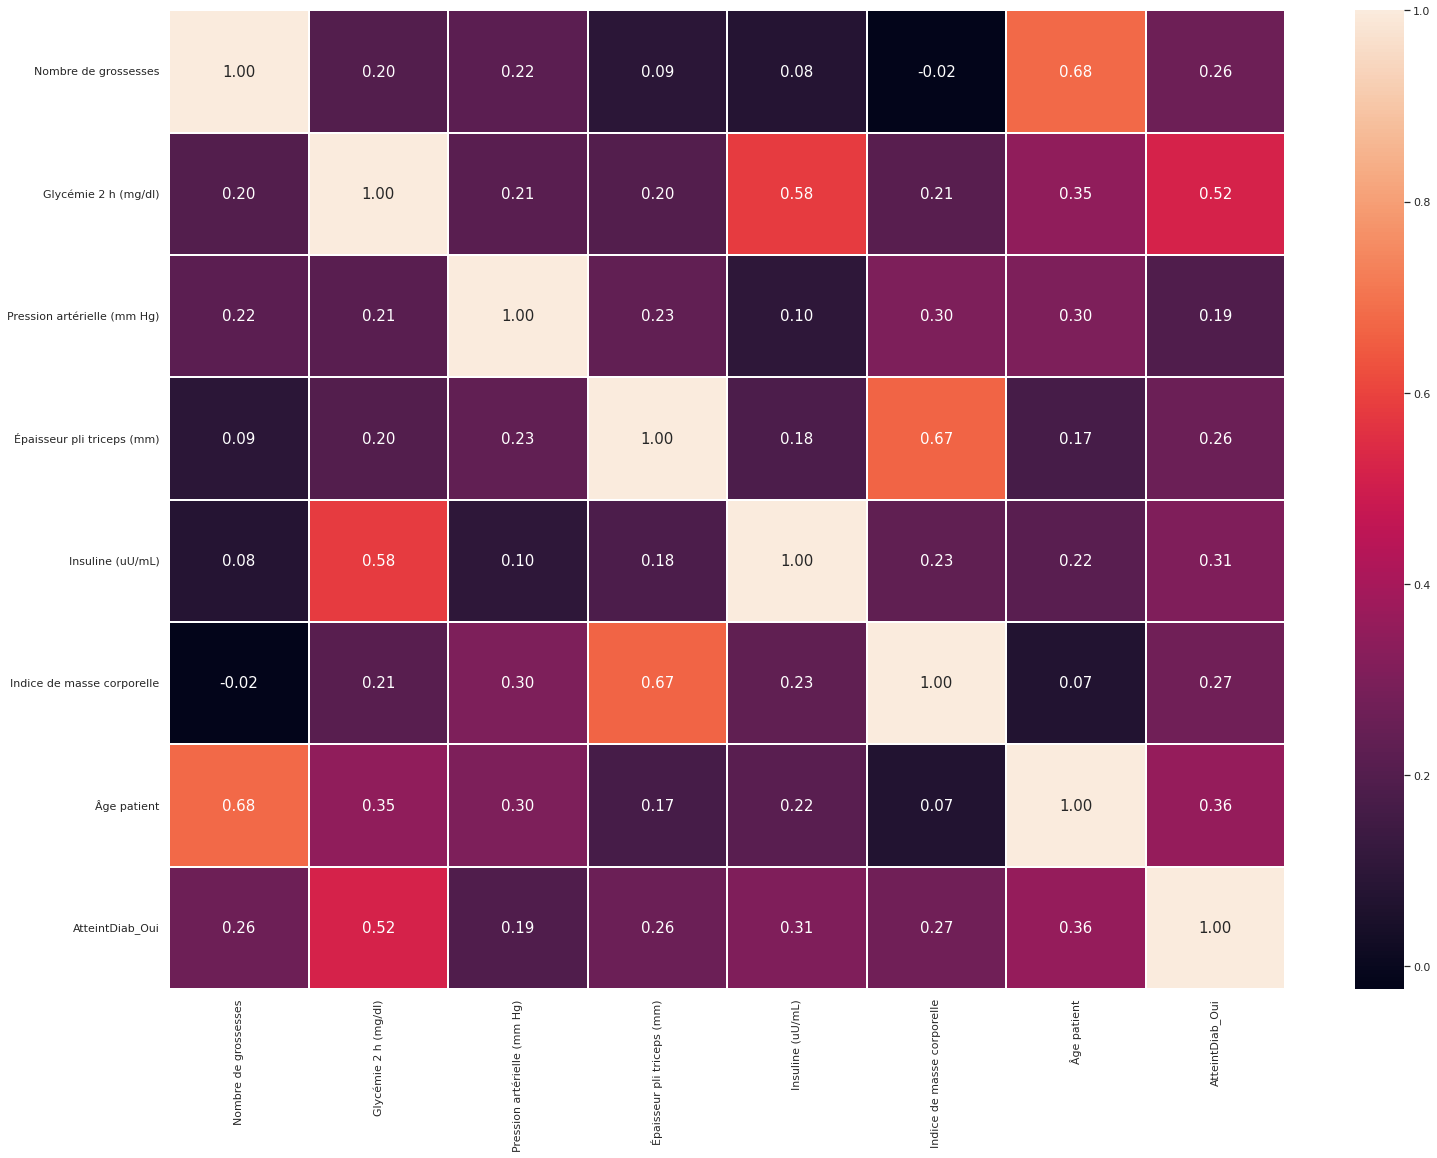

In [18]:
sn.set (rc = {'figure.figsize':(25, 18)})
sn.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size":15}, linewidths=1.5)

##
#### Q 1.4) dans ce dataset, les 3 variables qui on plus d'impact sur le développement de diabètes sont: Glycémie (0.52), Âge (0.36) et Insuline (0.31)
##

##
#### Q 1.5) moyenne, écart-type, min, Q1, Q2, Q3, max
#### --> C'est fait avec la commande 'describe' que l'on répète ici
##

In [19]:
### moyenne(mean) , écart-type(std), min(min), Q1(25%), Q2(50%), Q3(75%), max(max)
dfDiabetes.describe()

,Patient_ID,Nombre de grossesses,Glycémie 2 h (mg/dl),Pression artérielle (mm Hg),Épaisseur pli triceps (mm),Insuline (uU/mL),Indice de masse corporelle,Âge patient,AtteintDiab_Non,AtteintDiab_Oui
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,389.512821,3.310256,122.574359,70.623077,29.146154,156.417949,33.074615,30.900000,0.671795,0.328205
std,215.649753,3.215267,30.810781,12.506820,10.539517,118.985870,7.042288,10.215053,0.470163,0.470163
min,4.000000,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000
25%,207.500000,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,23.000000,0.000000,0.000000
50%,387.500000,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,27.000000,1.000000,0.000000
75%,568.750000,5.000000,143.000000,78.000000,37.000000,190.000000,37.075000,36.000000,1.000000,1.000000
max,766.000000,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,81.000000,1.000000,1.000000


##
#### Q 1.6 histogramme fréquence distrib âge patient
##

Âge patient    1.396129
dtype: float64


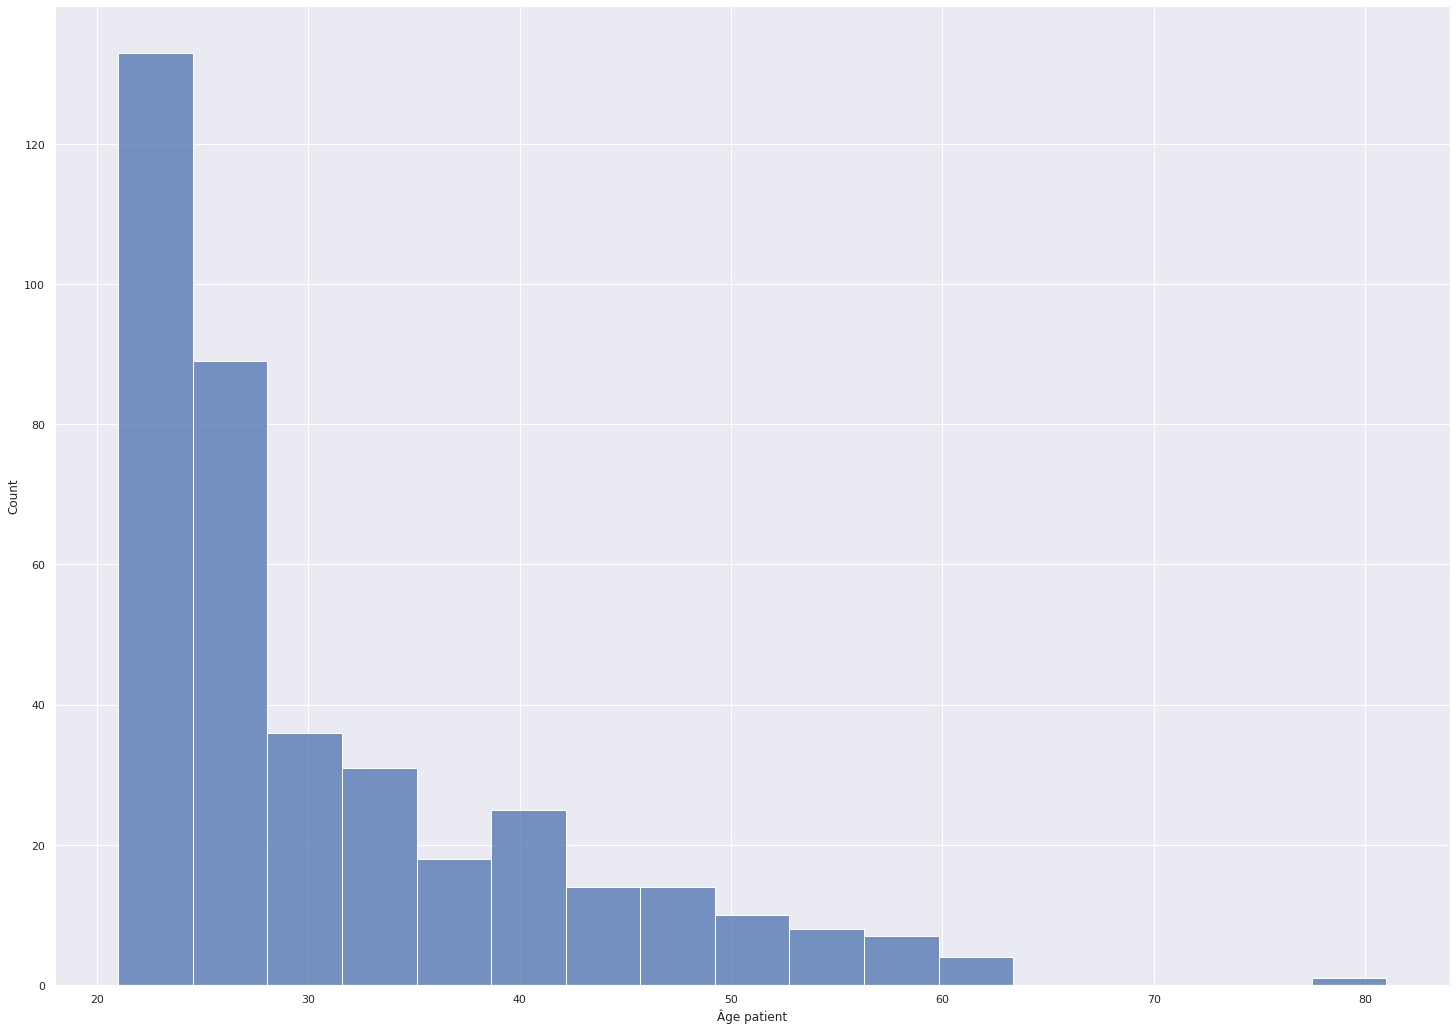

In [20]:
colAge = dfDiabetes['Âge patient']
sn.histplot(colAge)
print(pd.DataFrame(colAge).skew())

##
##### 1.6) ---> La variable est clairement assymétrique avec un skew = 1.396129
##

##
###  Q2) Analyse jeux de données
#### Q2.1
##

In [21]:
# lecture csv DonneesConsomEau_v0r2.csv
fileName = "DonneesConsomEau_v0r2.csv"
dfConsomEau = get_df_from_csv(str(d)+"/"+fileName)
dfConsomEau.describe()

pPath:  /home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01/DonneesConsomEau_v0r2.csv


,Code (ID),# Région Adm,Consommation résidentielle (L/pers/j),Nb de réseaux distribution,Population desservie,Nb logements desservis,Nb pers par logement,Volume d'eau distribué (ML/an)
count,599.000000,599.000000,599.000000,599.000000,5.990000e+02,599.000000,599.000000,5.990000e+02
mean,46987.637730,9.317195,236.954925,1.225376,1.155536e+04,5295.078464,2.177846,2.056004e+06
std,28023.443278,5.683652,88.028763,0.699467,8.441931e+04,40839.609147,0.329347,2.165877e+07
min,2005.000000,1.000000,97.000000,1.000000,5.400000e+01,23.000000,1.090000,5.110000e+00
25%,22007.500000,3.000000,179.000000,1.000000,5.035000e+02,238.000000,1.970000,3.526250e+04
50%,45093.000000,11.000000,219.000000,1.000000,1.222000e+03,574.000000,2.190000,1.288550e+05
75%,71047.500000,15.000000,271.500000,1.000000,3.717500e+03,1640.000000,2.390000,4.678085e+05
max,99025.000000,17.000000,962.000000,9.000000,1.868103e+06,913108.000000,3.430000,5.127977e+08


In [22]:
dfConsomEau['Classe de population desservie'].unique()

array(['0 À\xa0 999 personnes', '1 000 À\xa0 4 999 personnes',
       '5 000 À\xa0 9 999 personnes', '10 000 À\xa0 49 999 personnes',
       '100 000 personnes et plus', '50 000 À\xa0 99 999 personnes'],
      dtype=object)

In [23]:
plt.pie(labels=dfConsomEau['Classe de population desservie'].unique())

TypeError: pie() missing 1 required positional argument: 'x'

##
##### !!! Q 2.1: Idéalement, je ferais un bar chart horizontale avec chaque catégorie comme libellé et la proportion (count per catégorie/total enregistrement) comme taille ou sinon un pie chart avec les mêmes principes. Je passe déjà trop de temps pour essayer de faire le pie chart, je reviens si le temps me permet. !!!
##

###
#### Q 2.2 - remplaces la variables ordinale par des valeurs de 1 à 6

In [ ]:
dfConsomEau.head()

,Code (ID),Nom,Région Administrative,# Région Adm,Classe de population desservie,Consommation résidentielle (L/pers/j),Nb de réseaux distribution,Population desservie,Nb logements desservis,Nb pers par logement,Volume d'eau distribué (ML/an)
0,2005,PERCÉ,Gaspésie–Îles-de-la-Madeleine (11),11,0 À 999 personnes,463,1,701,413,1.70,331022.00
1,2010,SAINTE-THÉRÈSE-DE-GASPÉ,Gaspésie–Îles-de-la-Madeleine (11),11,0 À 999 personnes,255,1,585,273,2.14,265.47
2,2015,GRANDE-RIVIÈRE,Gaspésie–Îles-de-la-Madeleine (11),11,1 000 À 4 999 personnes,519,1,3444,1391,2.48,1295654.00
3,2028,CHANDLER,Gaspésie–Îles-de-la-Madeleine (11),11,5 000 À 9 999 personnes,496,2,8205,3835,2.14,2835.43
4,2047,PORT-DANIEL-GASCONS,Gaspésie–Îles-de-la-Madeleine (11),11,0 À 999 personnes,288,2,918,490,1.87,169636.00


In [ ]:
dfConsomEau.dtypes

Code (ID)                                  int64
Nom                                       object
Région Administrative                     object
# Région Adm                               int64
Classe de population desservie            object
Consommation résidentielle (L/pers/j)      int64
Nb de réseaux distribution                 int64
Population desservie                       int64
Nb logements desservis                     int64
Nb pers par logement                     float64
Volume d'eau distribué (ML/an)           float64
dtype: object

In [ ]:
dfConsomEau['Classe de population desservie'].unique()

array(['0 À\xa0 999 personnes', '1 000 À\xa0 4 999 personnes',
       '5 000 À\xa0 9 999 personnes', '10 000 À\xa0 49 999 personnes',
       '100 000 personnes et plus', '50 000 À\xa0 99 999 personnes'],
      dtype=object)

##
##### La variable à remplacer est ['Classe de population desservie']
##

In [ ]:
## Y-a-t-il des nulls?
dfConsomEau.isnull().sum()

Code (ID)                                0
Nom                                      0
Région Administrative                    0
# Région Adm                             0
Classe de population desservie           0
Consommation résidentielle (L/pers/j)    0
Nb de réseaux distribution               0
Population desservie                     0
Nb logements desservis                   0
Nb pers par logement                     0
Volume d'eau distribué (ML/an)           0
dtype: int64

##
##### Q 2.2 ) Remplacement de la variable ['Classe de population desservie'] par numérique
##

In [ ]:
dictClassePopDesservie = {'0 À\xa0 999 personnes':1
, '1 000 À\xa0 4 999 personnes':2
, '5 000 À\xa0 9 999 personnes':3
, '10 000 À\xa0 49 999 personnes':4
, '50 000 À\xa0 99 999 personnes':5
,  '100 000 personnes et plus':6}

dfConsomEau['Classe de population desservie'].replace(dictClassePopDesservie, inplace=True)


In [ ]:
dfConsomEau['Classe de population desservie'].unique()

array([1, 2, 3, 4, 6, 5])

##
#### Q 2.3 ) Matrice de correlation
##

In [ ]:
dfConsomeauOnlyNum = dfConsomEau.select_dtypes(exclude='object')
dfConsomeauOnlyNum = dfConsomeauOnlyNum.drop(axis=1, columns=['Code (ID)'])
dfConsomeauOnlyNum.head()

,# Région Adm,Classe de population desservie,Consommation résidentielle (L/pers/j),Nb de réseaux distribution,Population desservie,Nb logements desservis,Nb pers par logement,Volume d'eau distribué (ML/an)
0,11,1,463,1,701,413,1.70,331022.00
1,11,1,255,1,585,273,2.14,265.47
2,11,2,519,1,3444,1391,2.48,1295654.00
3,11,3,496,2,8205,3835,2.14,2835.43
4,11,1,288,2,918,490,1.87,169636.00


In [ ]:
corrConsomEau = dfConsomeauOnlyNum.corr()

<AxesSubplot:>

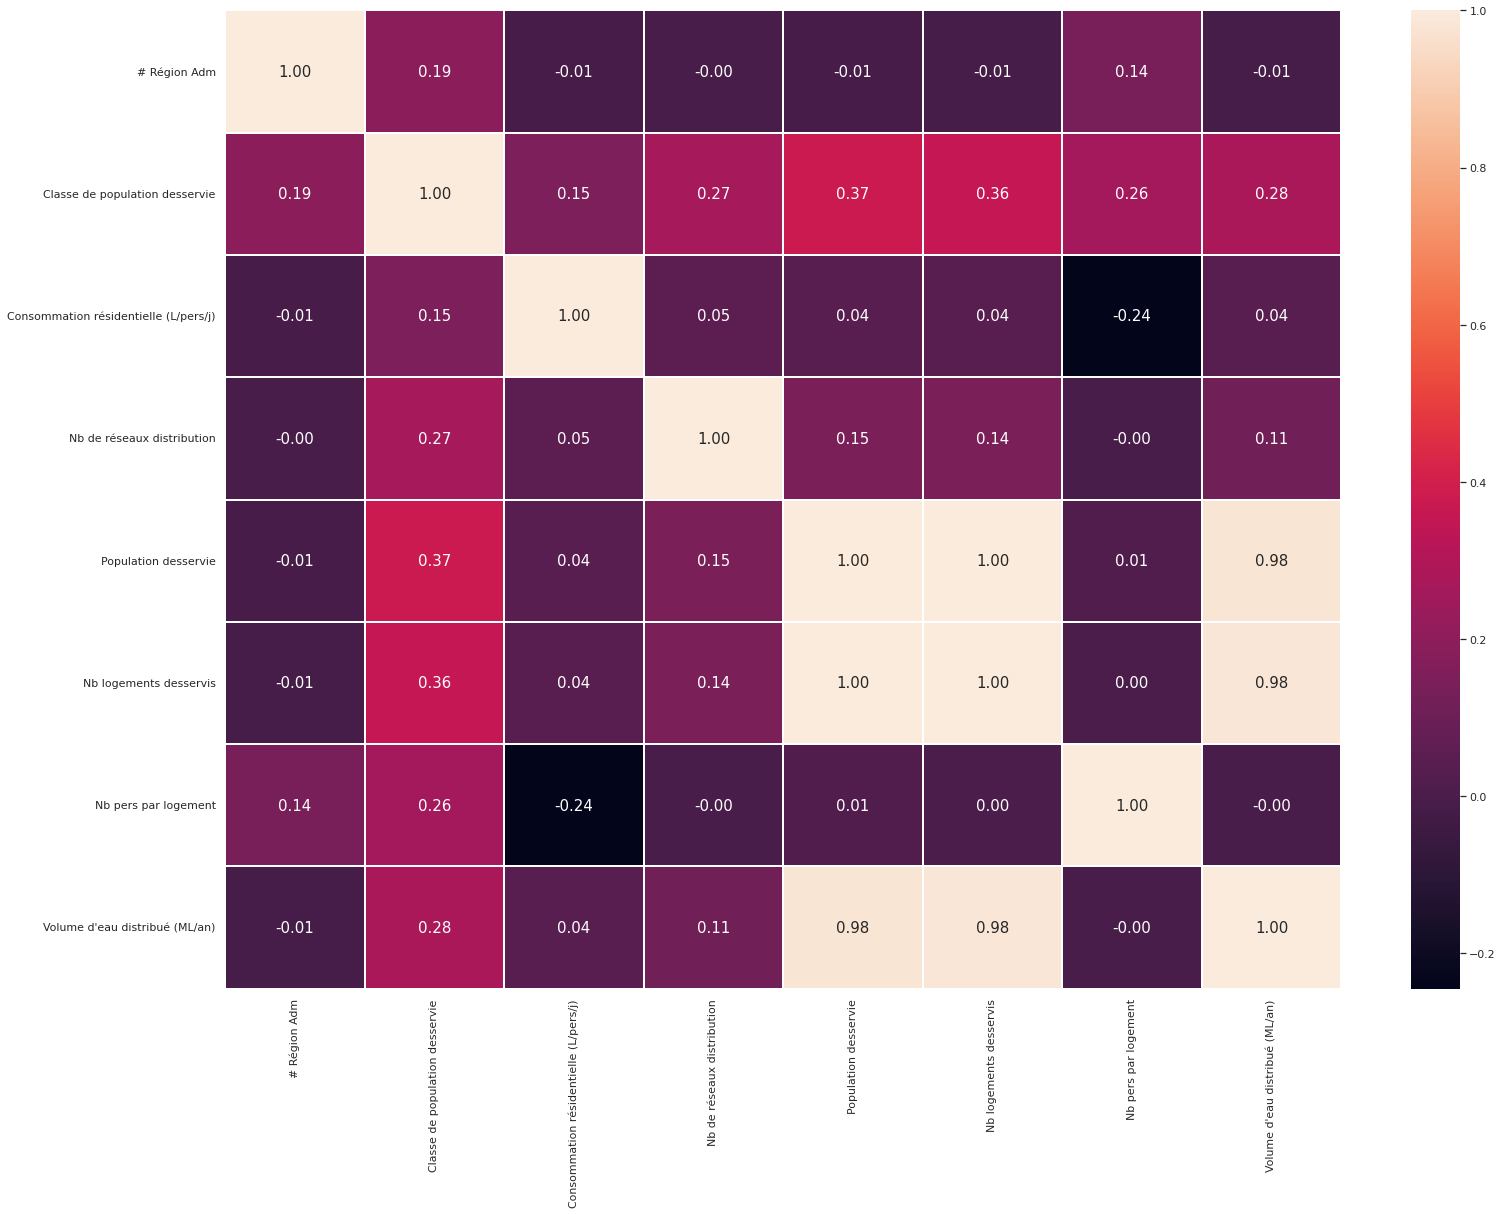

In [ ]:
sn.set (rc = {'figure.figsize':(25, 18)})
sn.heatmap(corrConsomEau, annot=True, fmt='.2f', annot_kws={"size":15}, linewidths=1.5)

##
##### Q 2.3) ---> LEs 3 variables les plus corrélées avec volume d'eau sont: 'Population desservie'(0.98), 'Nb logements desservis' (0.98) et 'Classe de population desservie'(0.28)
##

##
#### Q 2.4 - Consommation résidentielles par région adm
###

<AxesSubplot:xlabel='# Région Adm', ylabel='Consommation résidentielle (L/pers/j)'>

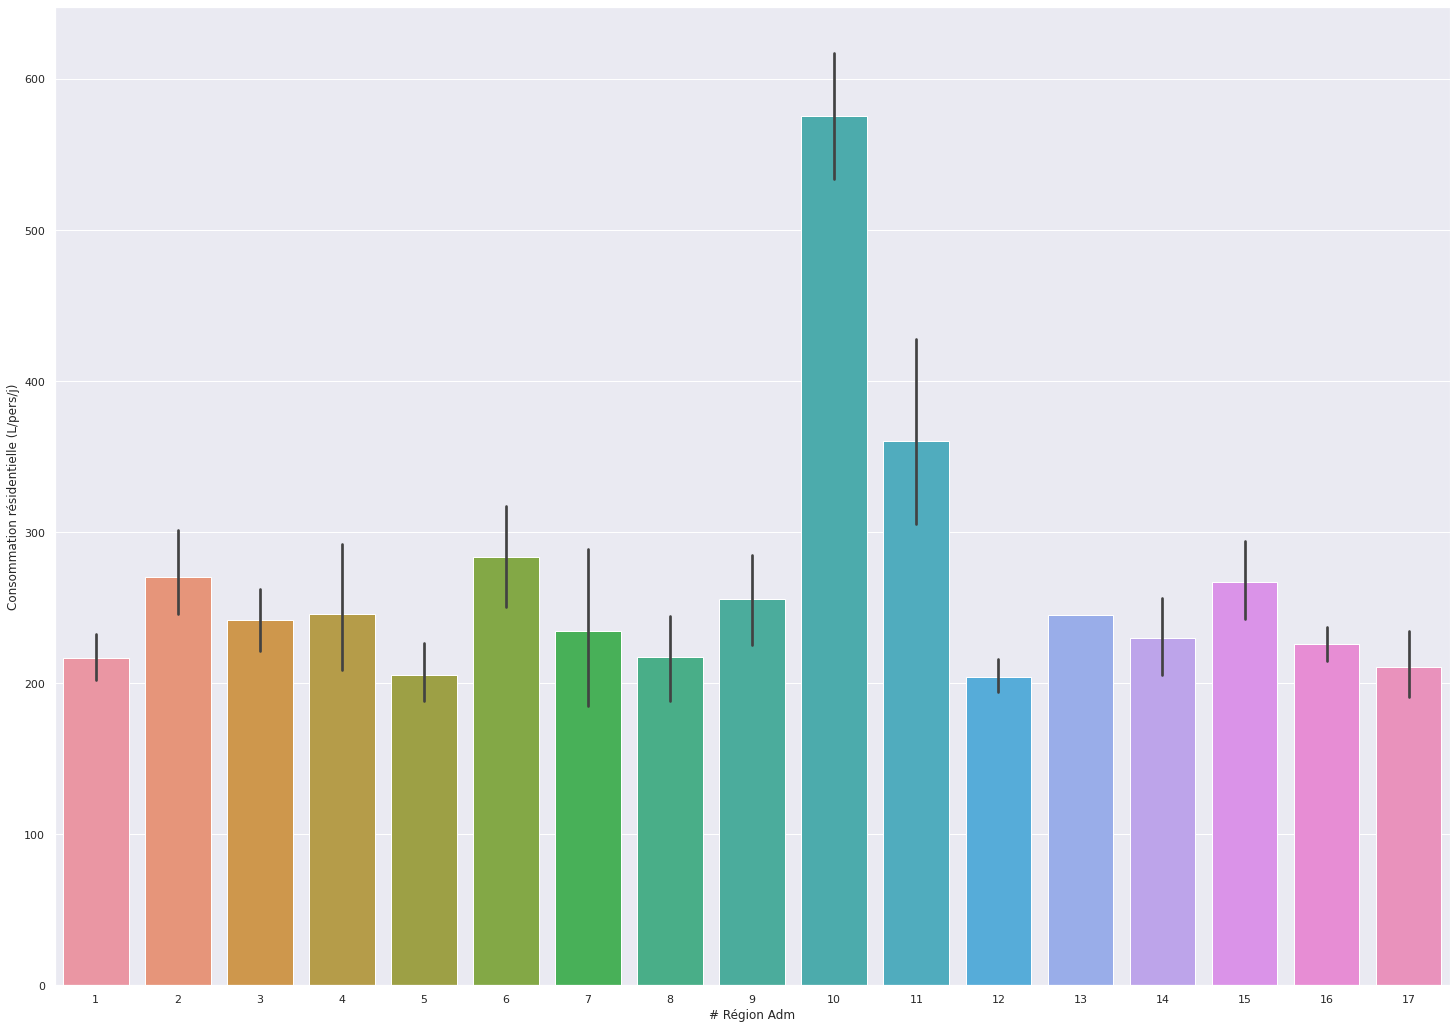

In [ ]:
sn.barplot(x='# Région Adm', y='Consommation résidentielle (L/pers/j)', data=dfConsomeauOnlyNum)

##
##### Q 2.4) ---> Oui, il semble avoir des différences entre les régions. La région 10 est de loin celle qui consomme le plus
##

##
#### Q 2.5) Diagrame nuage points (« Population desservie ») vs « Volume d'eau distribué (ML/an) »
##

<AxesSubplot:xlabel='Population desservie', ylabel="Volume d'eau distribué (ML/an)">

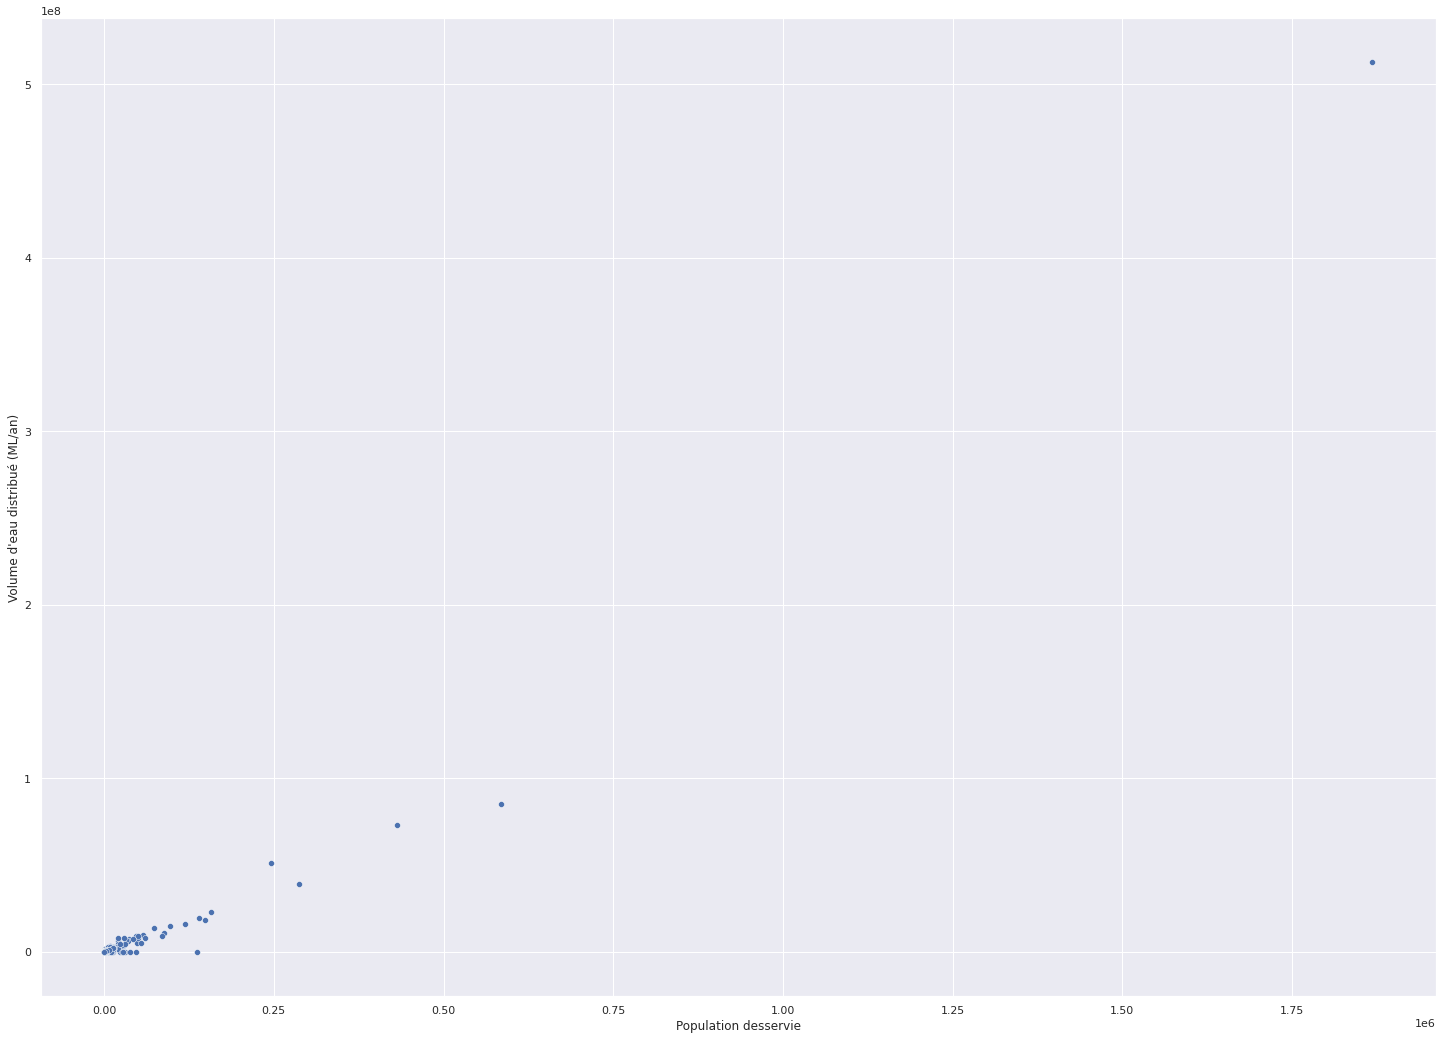

In [ ]:
sn.scatterplot(x='Population desservie', y="Volume d'eau distribué (ML/an)", data=dfConsomeauOnlyNum)

##
##### Q 2.5) ---> Tendance: le plus la population augmente, le plus le volume d'eau distribué augmente. Il y a un point qui sort du lot, celui de la population près 2M
##

##
#### Q 3) Analyse Monte Carlo
##

In [24]:
# lecture csv Restaurantv0r2.csv.csv
fileName = "Restaurantv0r2.csv"
dfRestaurant = get_df_from_csv(str(d)+"/"+fileName)
dfRestaurant.describe()

pPath:  /home/hadoop/Git_Ia/CegepSteFoy_IA/04_Eda/Exam01/Restaurantv0r2.csv


,Durée préparation (min),Durée repas (min)
count,119.000000,119.000000
mean,24.563025,44.756303
std,5.442517,8.781690
min,15.000000,30.000000
25%,20.000000,37.000000
50%,25.000000,45.000000
75%,29.000000,52.000000
max,35.000000,60.000000


##
##### Q 3.1) fonction helper et appel à la fonction pour générer les histogrammes

In [26]:
## plot diagrams according to oper. Default = histplot
## pDf = dataFrame
##
def helper_univariate_oper(pDf, pListCols, pOper='histplot'):
    print("Generating histograms for every variable in the dataframe")    
    i=0
    for col in (pListCols):
        colName  = str(col)
        print("[colName]: ", colName)
        #print("dir([colName]): ", dir(colName))
        
        plt.figure(i)
        if(pOper.strip().lower() == 'histplot'):
            sn.histplot(pDf[colName], bins=10)
        elif (pOper.strip().lower() == 'boxplot'):
            sn.boxplot(pDf[colName])
        elif (pOper.strip().lower() == 'violinplot'):
            sn.violinplot(pDf[colName])
        else:
            sn.histplot(pDf[colName])
        i+=1        

Generating histograms for every variable in the dataframe
[colName]:  Durée préparation (min)
[colName]:  Durée repas (min)


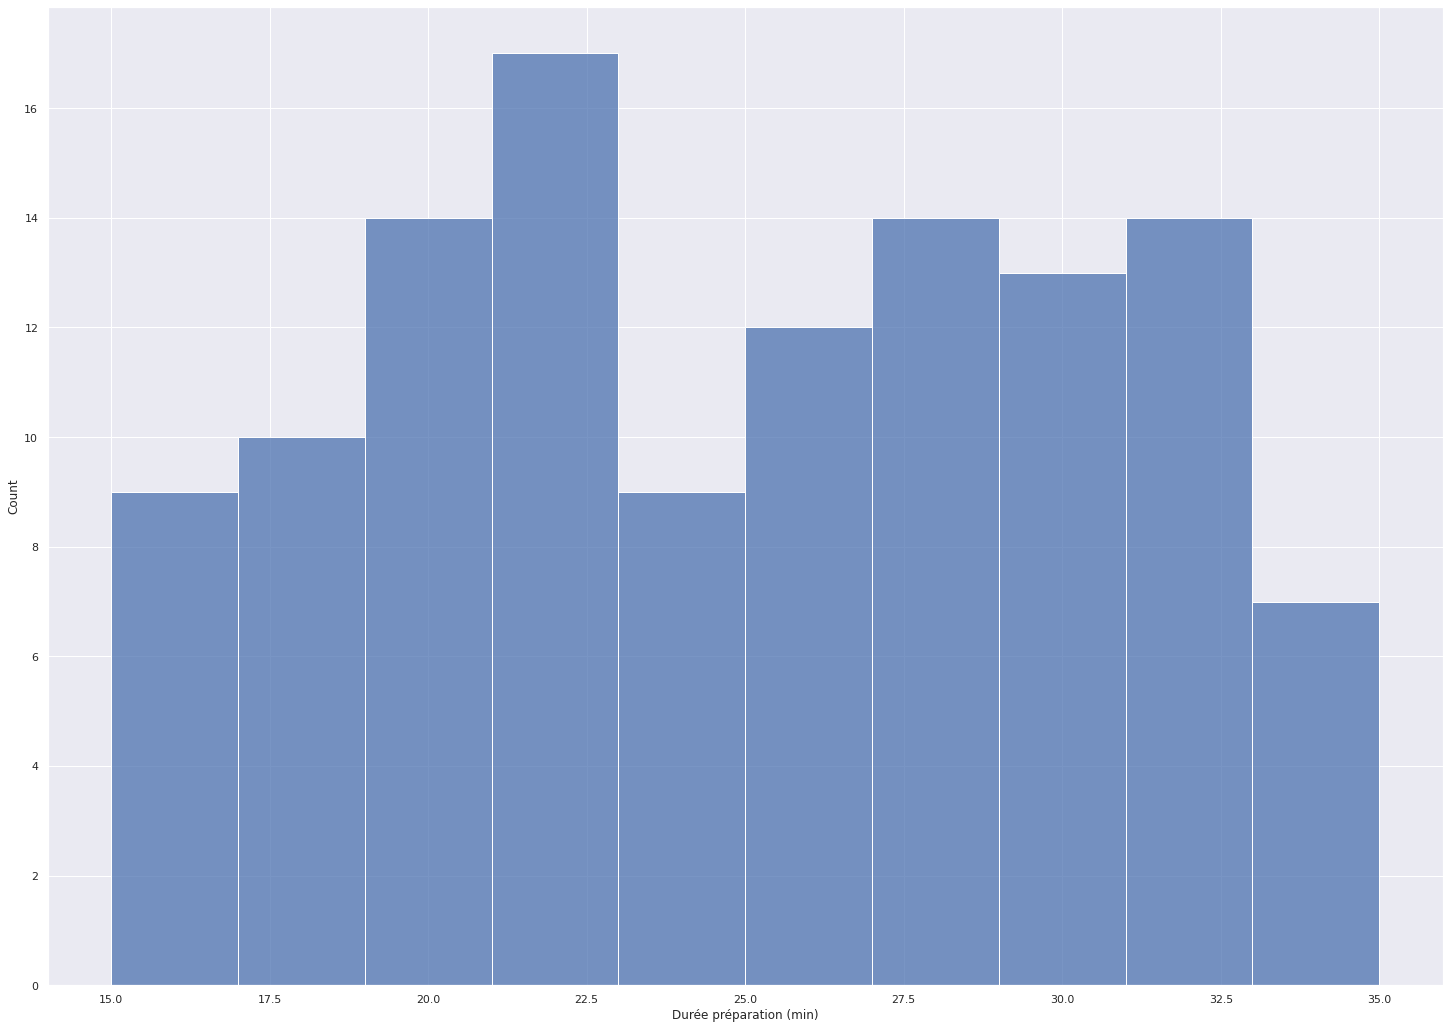

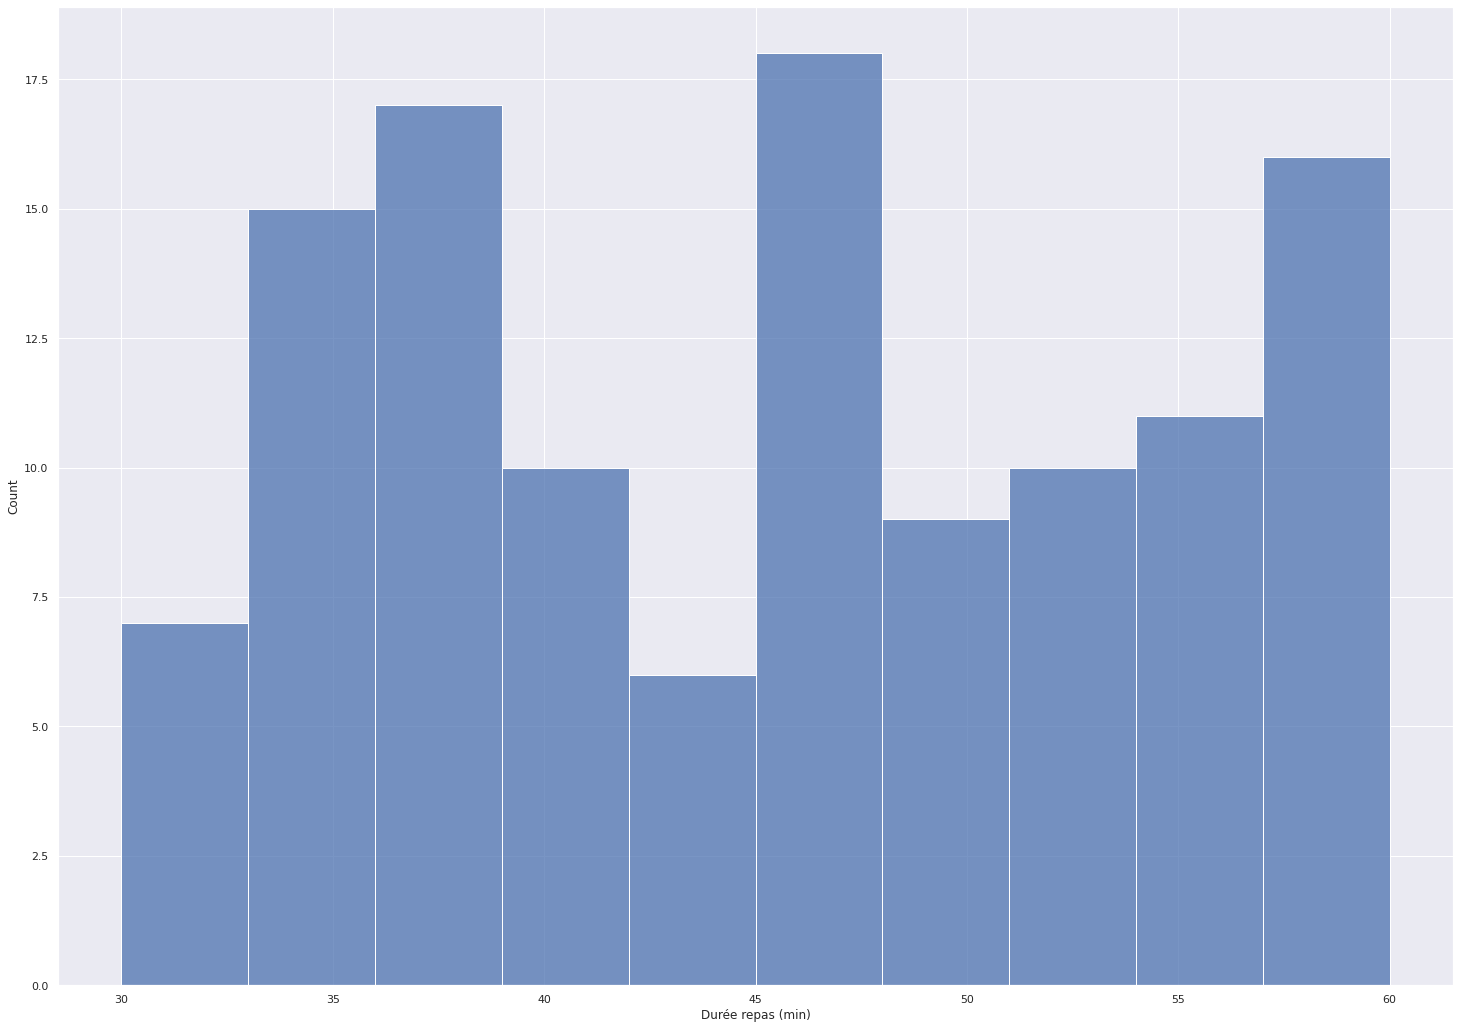

In [27]:
### On appelle la fonction helper avec toutes les colonnes du dataframe
helper_univariate_oper(dfRestaurant, dfRestaurant.columns)

##
##### 3.2 ) Simul Monte Carlo

In [28]:
dfRestaurant.head()

,Durée préparation (min),Durée repas (min)
0,16,58
1,31,52
2,16,45
3,23,33
4,30,33


##
#### Q 3.2) ---> fonction de simul et appel à la fonction
##

In [35]:
### Temps Total (min) = Durée préparation (min) + Durée repas (min)
def get_df_simul_resto(pNbRuns, pColDurePrep, pColDureRepas):
    dure_prep_pred=[]
    dure_repas_pred=[]
    temps_tot_pred=[]

    for i in range(pNbRuns):
        dure_prep = random.choice(pColDurePrep)
        dure_repas = random.choice(pColDureRepas)
        temps_tot = dure_prep + dure_repas

        dure_prep_pred.append(dure_prep)
        dure_repas_pred.append(dure_repas)
        temps_tot_pred.append(temps_tot)
    
    dure_prep_pred = pd.DataFrame(dure_prep_pred)
    dure_repas = pd.DataFrame(dure_repas_pred)
    temps_tot_pred= pd.DataFrame(temps_tot_pred)

    return temps_tot_pred



In [42]:
dfTempsResto = get_df_simul_resto(10000, dfRestaurant['Durée préparation (min)'], dfRestaurant['Durée repas (min)'])

In [40]:
#### LA fonction du helper n'a pas marché, alors j'ajoute celle-ci:
## plot graph
def plot_graph(pDf, pXlabel):
    ax = pDf.plot.hist(density=False, bins=10)
    ax.set_xlabel(pXlabel)
    pDf.describe()

###
##### Q 3.3 ---> Histogramme avec 10 bins
###

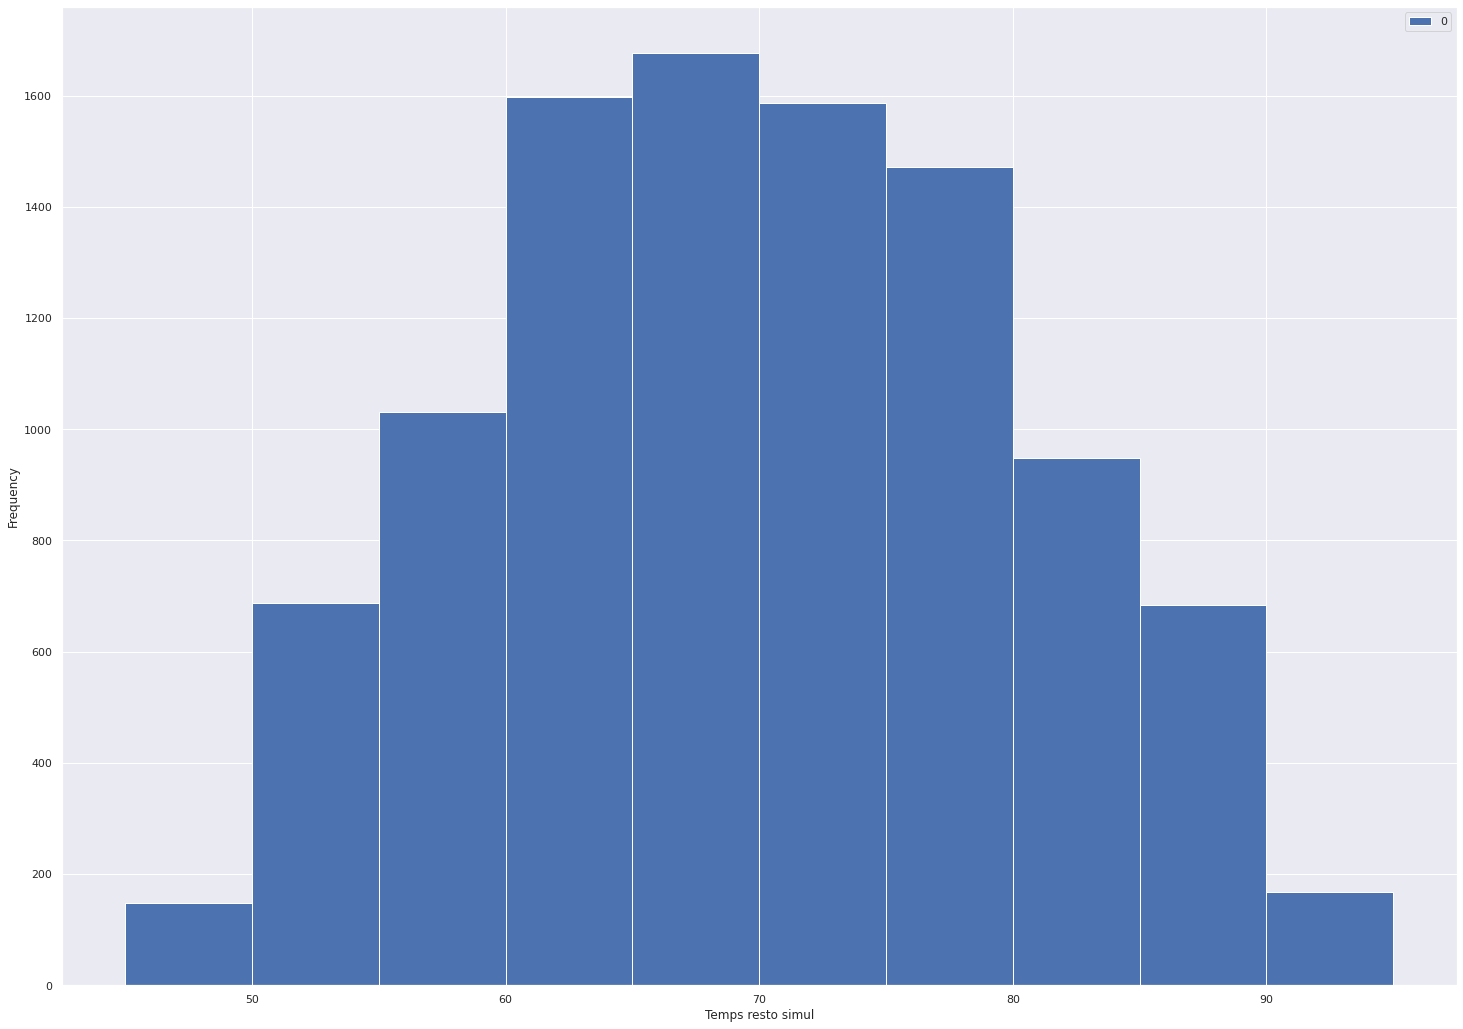

In [43]:
## on plot le graph
plot_graph(dfTempsResto, "Temps resto simul")

##
#### Q 04)
##

##### Q 4.1) X.replace(nan, 0) ---> Toutes les occurences de NaN seront remplacées par 0

##### Q 4.2) valeurs aberrantes: dans le 2, 3 min de temps qui me restent: on connaît las valeurs a enlever. Utiliser sqldf, créer une requête SQL avec la WHERE clause qui exclut la données abérrantes

##### Q 4.3)  Ce type de traitement déplace les données d'une période. C'est généralement pour une série temporelle (time series)